<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/PythoFinance(Cap1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
#CONVERTIR PRECIOS EN RETORNOS
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
df= yf.download("MSFT","2000-01-01","2010-12-31",progress=False)

In [ ]:
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [ ]:
df["simple_return"]=df.adj_close.pct_change()
df["log_return"]=np.log(df.adj_close/df.adj_close.shift(1))

In [ ]:
df

,adj_close,simple_return,log_return
Date,,,
2000-01-03,0.858137,NaN,NaN
2000-01-04,0.785788,-0.084310,-0.088078
2000-01-05,0.797286,0.014633,0.014527
2000-01-06,0.728290,-0.086538,-0.090514
2000-01-07,0.762789,0.047369,0.046281
...,...,...,...
2010-12-23,9.923155,-0.004797,-0.004809
2010-12-27,9.956272,0.003337,0.003332
2010-12-28,9.980495,0.002433,0.002430


In [ ]:
pip install quandl

In [ ]:
#CALCULAR LA INFACION
import quandl
mikey="rYk2SPMY4NNhnTEtdrj5JPaUWwTsp6b2"
quandl.ApiConfig.api_key= mikey
df_all_dates= pd.DataFrame(index=pd.date_range(start="2000-01-01",end="2010-12-31"))
df=df_all_dates.join(df[["adj_close"]],how="left").fillna(method="ffill").asfreq("M")
df_cpi = quandl.get(dataset='RATEINF/CPI_USA', start_date='1999-12-01', end_date='2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)
df_merged = df.join(df_cpi, how='left')

In [ ]:
def real_volitily(x):
  return np.sqrt(np.sum(x**2))

In [ ]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(real_volitily)
df_rv.rename(columns={'log_return': 'rv'}, inplace=True)


In [ ]:
df_rv

,adj_close,simple_return,rv
Date,,,
2000-01-31,3.551689,0.235272,0.236246
2000-02-29,3.831639,0.149059,0.147841
2000-03-31,4.734313,0.249920,0.243592
2000-04-30,4.119167,0.213318,0.212513
2000-05-31,3.648287,0.181835,0.184990
...,...,...,...
2010-08-31,36.165479,0.059837,0.060304
2010-09-30,38.527265,0.066622,0.065954
2010-10-31,42.313912,0.070315,0.069618


In [ ]:
df_rv.rv = df_rv.rv * np.sqrt(12)

In [ ]:
df_rv

,adj_close,simple_return,rv
Date,,,
2000-01-31,3.551689,0.235272,0.818381
2000-02-29,3.831639,0.149059,0.512137
2000-03-31,4.734313,0.249920,0.843828
2000-04-30,4.119167,0.213318,0.736167
2000-05-31,3.648287,0.181835,0.640824
...,...,...,...
2010-08-31,36.165479,0.059837,0.208900
2010-09-30,38.527265,0.066622,0.228471
2010-10-31,42.313912,0.070315,0.241163


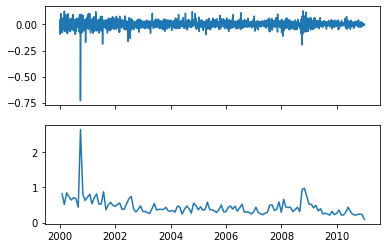

In [ ]:
fig, ax= plt.subplots(2,1,sharex=True)
ax[0].plot(df.log_return)
ax[1].plot(df_rv.rv)
plt.show()

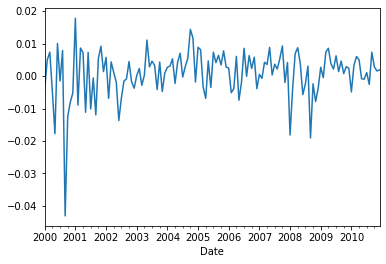

In [ ]:
df.log_return.resample("M").mean().plot()

In [ ]:
df

,adj_close,simple_return,log_return
Date,,,
2000-01-03,0.858137,NaN,NaN
2000-01-04,0.785788,-0.084310,-0.088077
2000-01-05,0.797286,0.014633,0.014527
2000-01-06,0.728290,-0.086539,-0.090514
2000-01-07,0.762789,0.047369,0.046281
...,...,...,...
2010-12-23,9.923151,-0.004798,-0.004809
2010-12-27,9.956267,0.003337,0.003332
2010-12-28,9.980495,0.002433,0.002430


[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

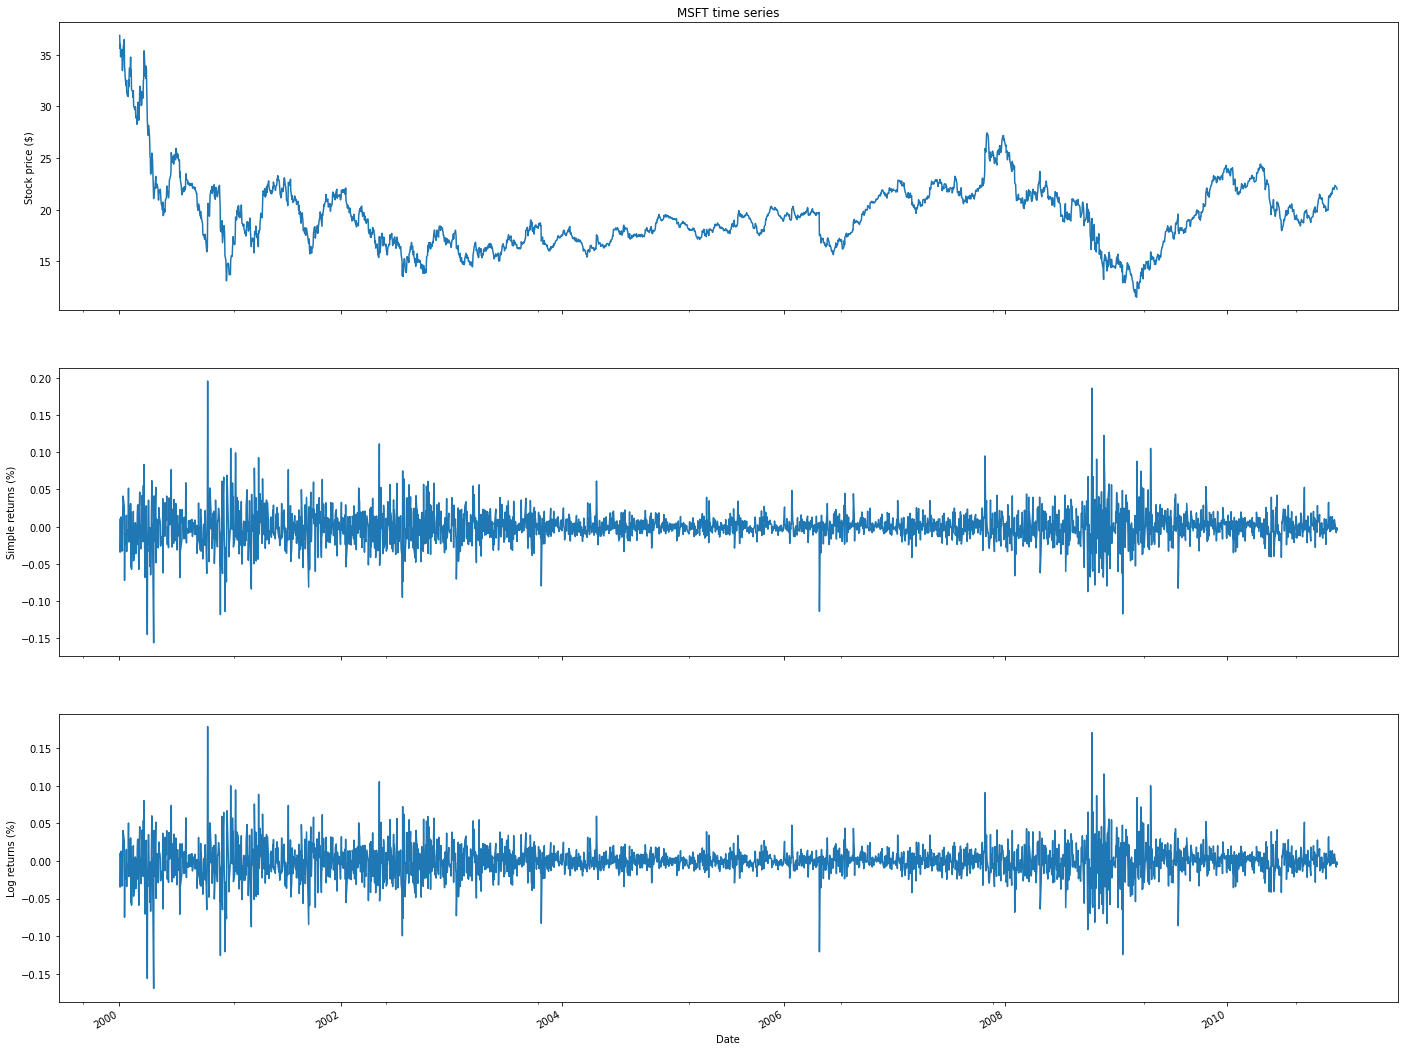

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(24, 20), sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'MSFT time series', ylabel = 'Stock price ($)')

df.simple_return.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

df.log_return.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', ylabel = 'Log returns (%)')

In [ ]:
#OUTLIERS 

In [ ]:
df_rolling=df.simple_return.rolling(21).agg(["mean","std"])

In [ ]:
df_outliers =df.join(df_rolling)


In [ ]:
def identifica_outliers(row, nsigmas=3):
  x = row['simple_return']
  mu = row['mean']
  sigma = row['std']
  if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
    return 1
  else:
    return 0

In [ ]:
df_outliers["outlier"]=df_outliers.apply(identifica_outliers,axis=1)
outliers= df_outliers.loc[df_outliers.outlier==1,["simple_return"]]

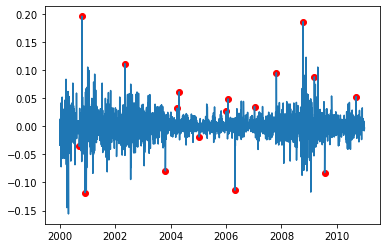

In [ ]:
fig,ax=plt.subplots()

ax.plot(df_outliers.index,df_outliers.simple_return)

ax.scatter(outliers.index,outliers.simple_return,color="red")


In [ ]:
#STYLIZED FACTS OF ASSETS RETURNS

In [ ]:
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm 
import statsmodels.tsa.api as smt 

In [ ]:
df

,adj_close,simple_return,log_return
Date,,,
2000-01-03,36.861523,NaN,NaN
2000-01-04,35.616348,-0.033780,-0.034364
2000-01-05,35.991871,0.010544,0.010488
2000-01-06,34.786221,-0.033498,-0.034072
2000-01-07,35.240803,0.013068,0.012983
...,...,...,...
2010-12-23,22.354265,0.003902,0.003894
2010-12-27,22.172585,-0.008127,-0.008161
2010-12-28,22.125195,-0.002137,-0.002140


In [ ]:
min(df.log_return.dropna())

-0.16957675100240618

In [ ]:
np.linspace()

In [ ]:
#distribucion no gausiana re retornos
# 1. calcular la funcion de densidad de p() usando la media y la desviacion estandar
r_range = np.linspace(min(df.log_return.dropna()), max(df.log_return.dropna()), num=1000)
mu = df.log_return.mean()
sigma = df.log_return.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

Date
2000-01-03    False
2000-01-04     True
2000-01-05     True
2000-01-06     True
2000-01-07     True
              ...  
2010-12-23     True
2010-12-27     True
2010-12-28     True
2010-12-29     True
2010-12-30     True
Name: log_return, Length: 2766, dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

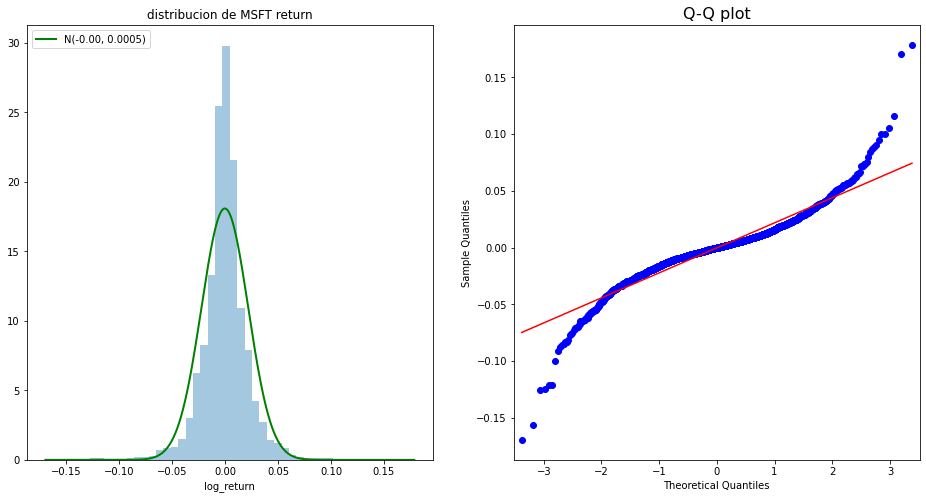

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,8))

#histogram
sns.distplot(df.log_return,kde=False,norm_hist=True,ax=ax[0])
ax[0].set_title("distribucion de MSFT return")
ax[0].plot(r_range, norm_pdf, 'g', lw=2, label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_return.dropna().values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

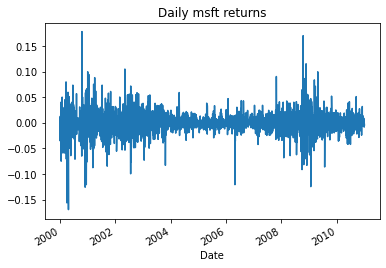

In [ ]:
#2 volatility clustering
df.log_return.plot(title="Daily msft returns")

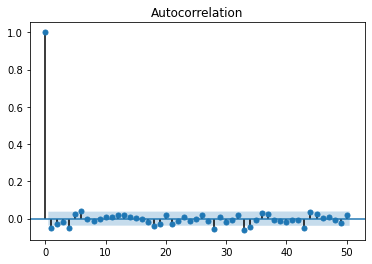

In [ ]:
#3 ausencia de autocorrelacion
N_lags=50
nivel_significancia=0.05
#funcion de autocorrelacion 
acf=smt.graphics.plot_acf(df.log_return.dropna(),lags=N_lags,alpha=nivel_significancia)
#se verifica si hay o no autocorrelacion,

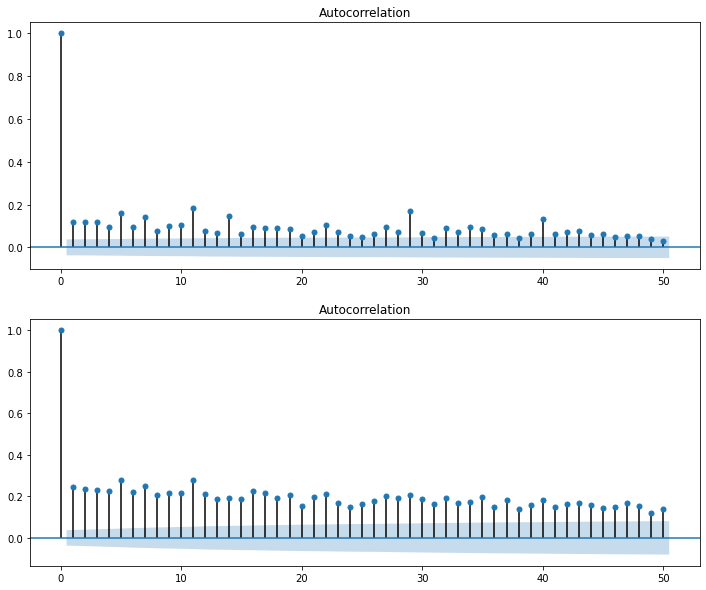

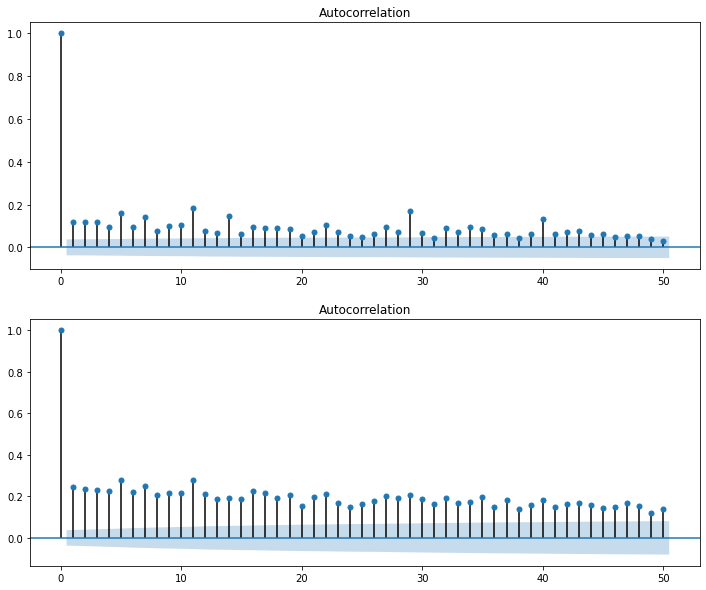

In [ ]:
#4 small and decreasing autocorrelation in squared/absolute returns, crear el acf plot
fig,ax=plt.subplots(2,1,figsize=(12,10))
smt.graphics.plot_acf(df.log_return.dropna()**2,lags=N_lags,alpha=nivel_significancia,ax=ax[0])
smt.graphics.plot_acf(np.abs(df.log_return.dropna()), lags=N_lags, alpha=nivel_significancia, ax = ax[1])


In [ ]:
5#LEVERAGE EFFECT 
#*calcular la volatilidad 
df['moving_std_252'] = df[['log_return']].rolling(window=252).std()
df['moving_std_21'] = df[['log_return']].rolling(window=21).std()


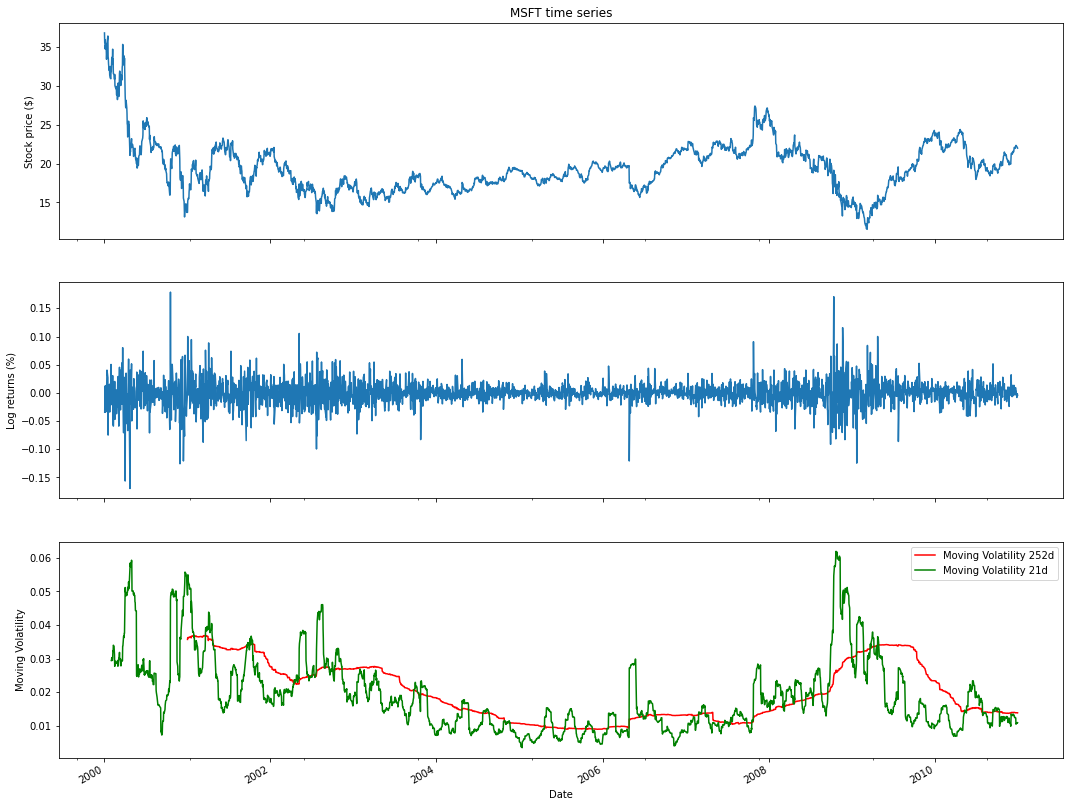

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15), sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series', ylabel='Stock price ($)')

df.log_return.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')

df.moving_std_252.plot(ax=ax[2], color='r', label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g', label='Moving Volatility 21d')

ax[2].set(ylabel='Moving Volatility', xlabel='Date')
ax[2].legend()

NameError: ignored

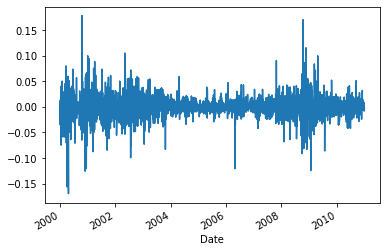

In [ ]:
df.log_return.plot()
twinx()
df.moving_std_21()